In [1]:
import numpy as np
import ot #package for optimal transport solver
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d #to plot in 3D
from helper import *

In [2]:
def to_two(x,n): #converting 1d coordinates to 2d coordinates
    return(int((x-x%n)/n), x%n)

In [22]:
def modified_norm(x):  #or should I just use np.sum??
    norm=0
    for y in x:
        if y<0:
            norm-=y**2
        else: 
            norm+=y**2
    return norm

In [3]:
n=20 #20 is good, doesn't take long to run and nice result
seed=981

np.random.seed(seed) #setting seed for reproducibility
X=np.random.uniform(size=(n**2,2)) 

x = np.linspace(1,n,n)/(n+1)
y = np.linspace(1,n,n)/(n+1)

X_coord, Y_coord = np.meshgrid(x, y) #describes a grid where (X_coord[i][j], Y_coord[i][j]) described the meshed points 

X_grid=np.array([[X_coord[i][j], Y_coord[i][j]] for j in range(n) for i in range(n)])
#a grid of the shape  [ (0,0), (0,1), ..., (0,n-1), ... , (n-1,0),...,(n-1,n-1)   ]

C=np.zeros((n**2,n**2))#cost matrix, C_ij is the distance between X_i and Y_j, of size n**2 times n**2

for i in range(n**2):
    for j in range(n**2):
        C[i,j]=np.linalg.norm(X[i]-X_grid[j])**2
        
a=np.ones(n**2)/n**2 #re-chech if indeed dividing by n**2
b=np.ones(n**2)/n**2
P_test=ot.emd(a, b, C, numItermax=100000, log=False, center_dual=True, numThreads=1, check_marginals=True)

In [6]:
# defining the interpolating function

In [25]:
f_2=np.zeros((n,n))  #f_2 is defined on the interior of the unit square

sigma=np.zeros(n**2)
X_p=np.zeros((n**2,2))

for i in range(n**2):
    index=np.argwhere(P_test[i,:]>0)
    
    X_p[index[0,0]]=X[i]


for i in range(0,n**2):
    x_f,y_f=to_two(i,n)
    #f_2[x_f][y_f]=np.linalg.norm(X_grid[i]-X_p[i]) #the norm??
    #f_2[x_f][y_f]=modified_norm(X_grid[i]-X_p[i], 1)
    f_2[x_f][y_f]=np.sum(X_grid[i]-X_p[i])

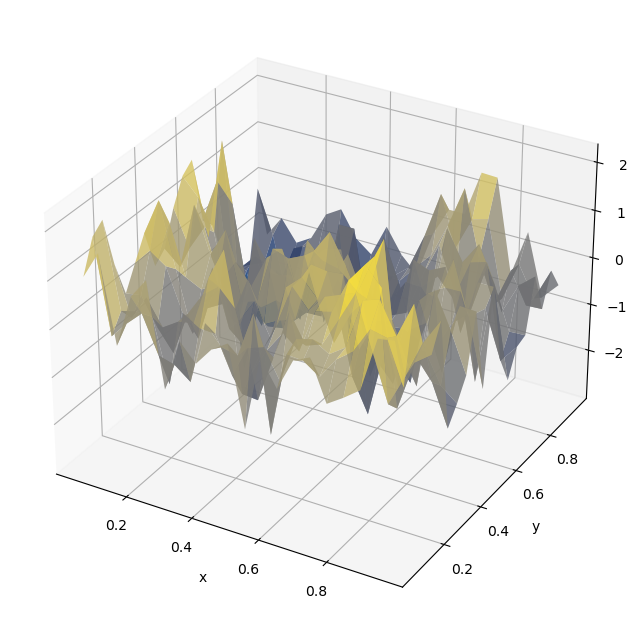

In [26]:
fig = plt.figure(figsize= (12,8))
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')

# x and y axis
X_axis=X_coord
Y_axis=Y_coord

Z_axis=n*f_2 #normializing by sqrt(n**2) ??
 
ax.plot_surface(X_axis, Y_axis, Z_axis, cmap='cividis', alpha=0.8)
 
ax.set_xlabel('x', fontsize=10)
ax.set_ylabel('y', fontsize=10)
ax.set_zlabel('z', fontsize=10)
 
plt.show()

In [9]:
def X_c_padded(X_coord):
    X_coord_temp=np.insert(X_coord, 0, X_coord[0], axis=0)
    X_coord_temp=np.insert(X_coord_temp, 0, X_coord[0], axis=0)
    X_coord_padded=np.insert(X_coord_temp, 0, 0, axis=1)
    X_coord_padded=np.insert(X_coord_padded, np.shape(X_coord_padded)[1], 1, axis=1)
    return X_coord_padded

In [10]:
def Y_c_padded(Y_coord):
    Y_coord_temp=np.insert(Y_coord.T, 0, Y_coord.T[0], axis=0).T
    Y_coord_temp=np.insert(Y_coord_temp.T, 0, Y_coord_temp.T[0], axis=0).T
    Y_coord_padded=np.insert(Y_coord_temp, 0, 0, axis=0)
    Y_coord_padded=np.insert(Y_coord_padded, np.shape(Y_coord_padded)[0], 1, axis=0)
    return Y_coord_padded

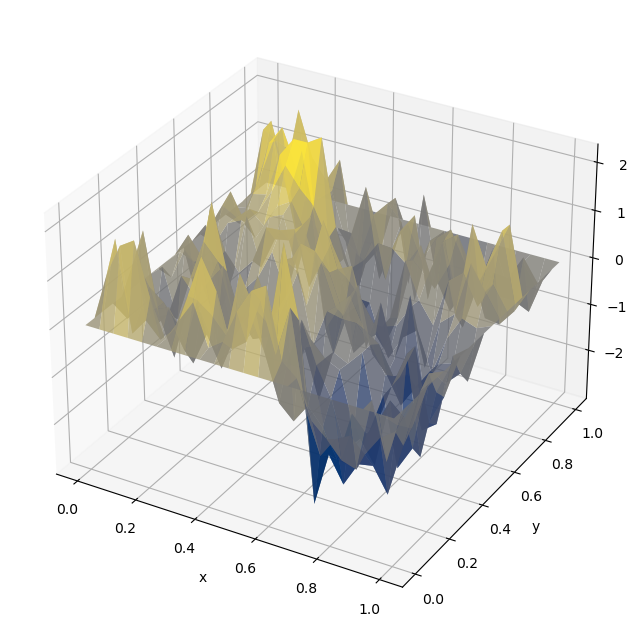

In [27]:
f_2_padded=np.pad(f_2, pad_width=1)

fig = plt.figure(figsize= (12,8))
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')

# x and y axis
X_axis_padded=Y_c_padded(Y_coord) #from the way I defined f, this makes more sense 
Y_axis_padded=X_c_padded(X_coord)
Z_axis_padded=n*f_2_padded #normalizing by sqrt(n**2)??
 
ax.plot_surface(X_axis_padded, Y_axis_padded, Z_axis_padded, cmap='cividis', alpha=0.8)
 
ax.set_xlabel('x', fontsize=10)
ax.set_ylabel('y', fontsize=10)
ax.set_zlabel('z', fontsize=10)
 
plt.show()